**Tasks**

**Data exploration**

Perform the following tasks:

- Plot a few images from each category
- Make a scree plot, how many components explain 10%, 20%, …, 90% and 100% of the variance?
- Visualize the features on a 2d-plot with PCA using the first two components. What can you say about the results?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
# get the class label limit
class_limit = 6

# class names
class_names = ["car", "bike", "other", "van", "motorcycle", "truck"]

In [4]:
# Load the numpy .npy file
train_dataset_array = np.load("train_dataset_array.npy")
train_dataset_array_labels = np.load("train_dataset_array_labels.npy")
train_dataset_array_features = np.load("train_features.npy")

print('Train data loaded')

Train data loaded


In [5]:
# Load the numpy .npy file
test_dataset_array = np.load("test_dataset_array.npy")
test_dataset_array_labels = np.load("test_dataset_array_labels.npy")
test_dataset_array_features = np.load("test_features.npy")

print('Test data loaded')

Test data loaded


In [6]:
# Load the numpy .npy file
valid_dataset_array = np.load("valid_dataset_array.npy")
valid_dataset_array_labels = np.load("valid_dataset_array_labels.npy")
valid_dataset_array_features = np.load("valid_features.npy")

print('Validation data loaded')

Validation data loaded


In [7]:
# Create X/y arrays
X_tr = train_dataset_array_features
y_tr = train_dataset_array_labels

print('X:', X_tr.shape, X_tr.dtype)
print('y:', y_tr.shape, y_tr.dtype)

X: (280, 1024) float32
y: (280,) int64


In [8]:
# Create X/y arrays
X_val = valid_dataset_array_features
y_val = valid_dataset_array_labels

print('X_val:', X_val.shape, X_val.dtype)
print('y_val:', y_val.shape, y_val.dtype)

X_val: (139, 1024) float32
y_val: (139,) int64


In [9]:
pd.value_counts(y_tr, normalize=True)

1    0.235714
0    0.228571
4    0.182143
5    0.150000
2    0.114286
3    0.089286
dtype: float64

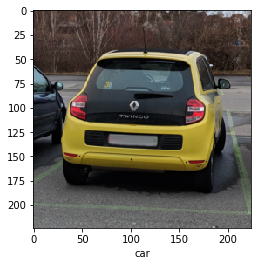

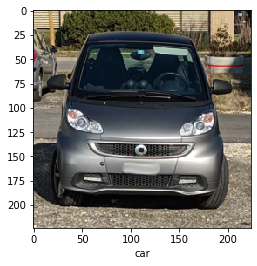

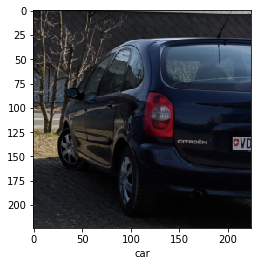

In [10]:
def label_img(number):
    # conversion 
    if number==0 : return 'car'
    #                             
    if number==1 : return 'bike'
    #                             
    if number==2 : return 'other'
    #                             
    if number==3 : return 'van'
    #                             
    if number==4 : return 'motorcycle'
    #                             
    if number==5 : return 'truck'

    
# Function to plot the i-th image from an array
def show_image(idx, images, labels):
    # Get image pixels from the input matrix X
    img = images[idx]
    plt.imshow(img)
    # Format the label to show the class name
    plt.xlabel(label_img(labels[idx]))
    plt.show()

# Show the first images from the training set
show_image(0, train_dataset_array, train_dataset_array_labels)
show_image(1, train_dataset_array, train_dataset_array_labels)
show_image(2, train_dataset_array, train_dataset_array_labels)

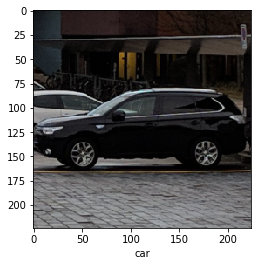

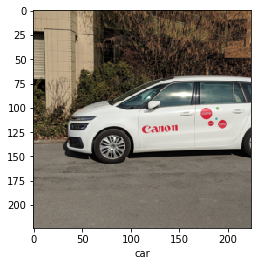

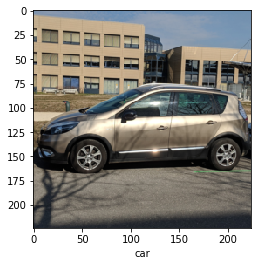

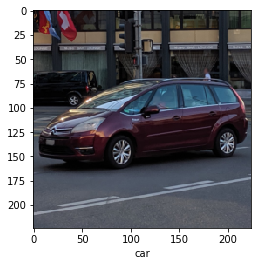

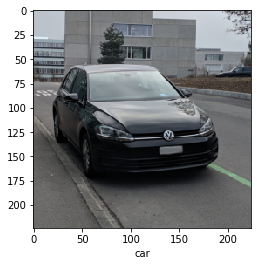

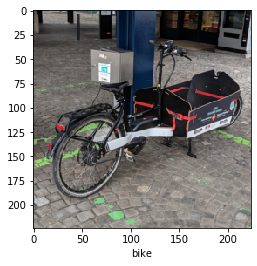

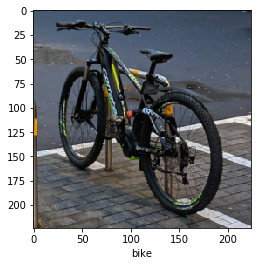

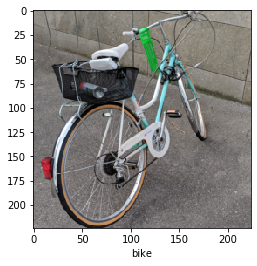

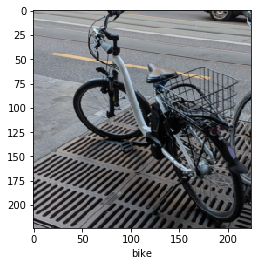

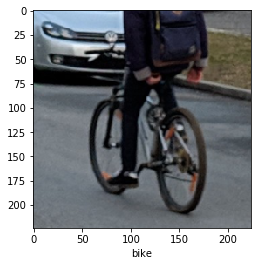

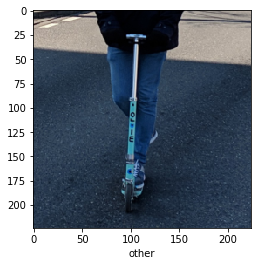

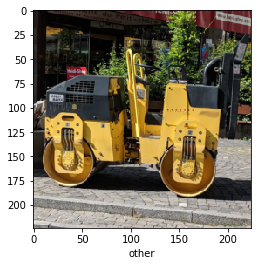

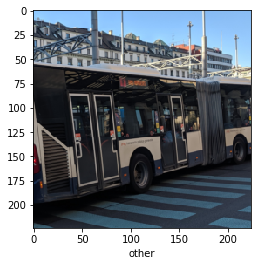

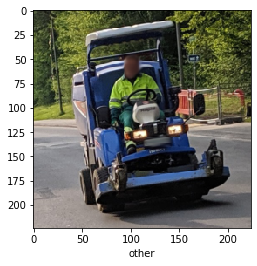

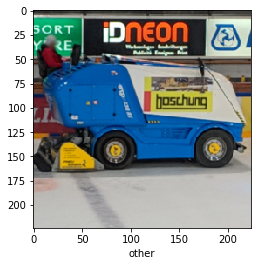

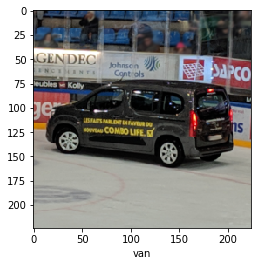

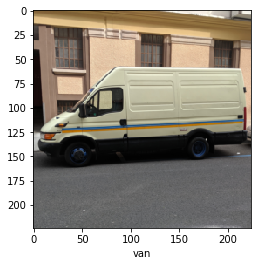

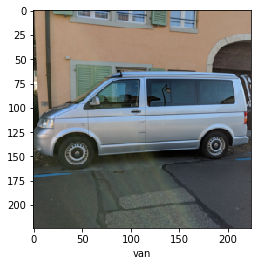

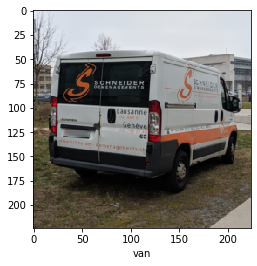

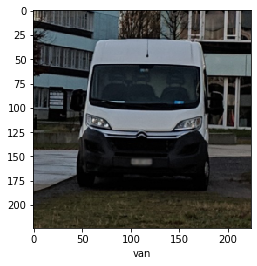

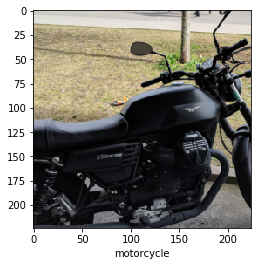

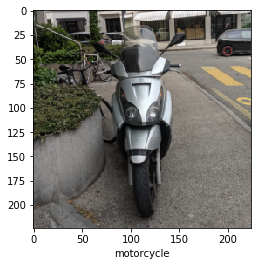

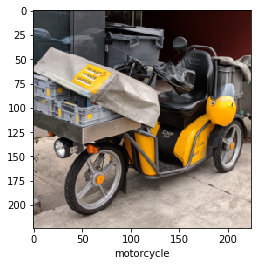

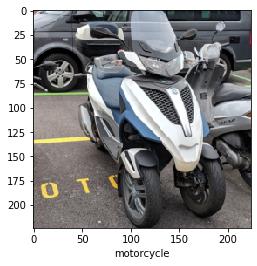

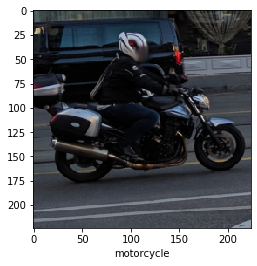

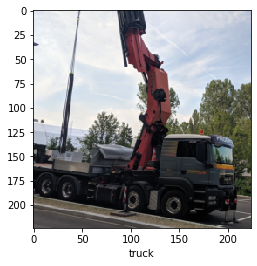

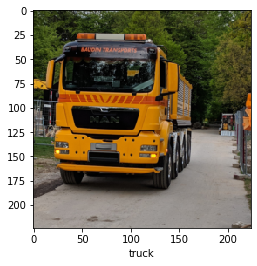

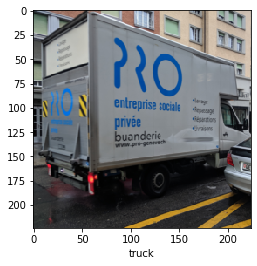

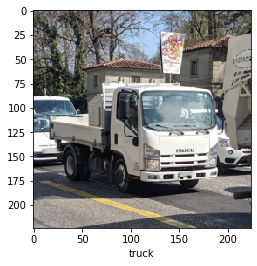

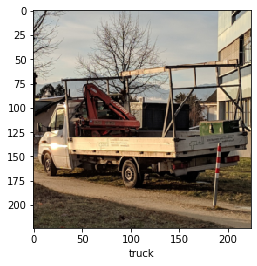

In [11]:
#select 5 random images from each class and plot them

def select_random(label, sample):
    class_idx = random.choice(np.where(np.array(y_tr) == label))
    random_x_classes = random.sample(class_idx.tolist(), sample)
    return random_x_classes
    
for i in range(0,len(class_names)):
    five_x = select_random(i, 5)
    for j in five_x:
        show_image(j, train_dataset_array, train_dataset_array_labels)

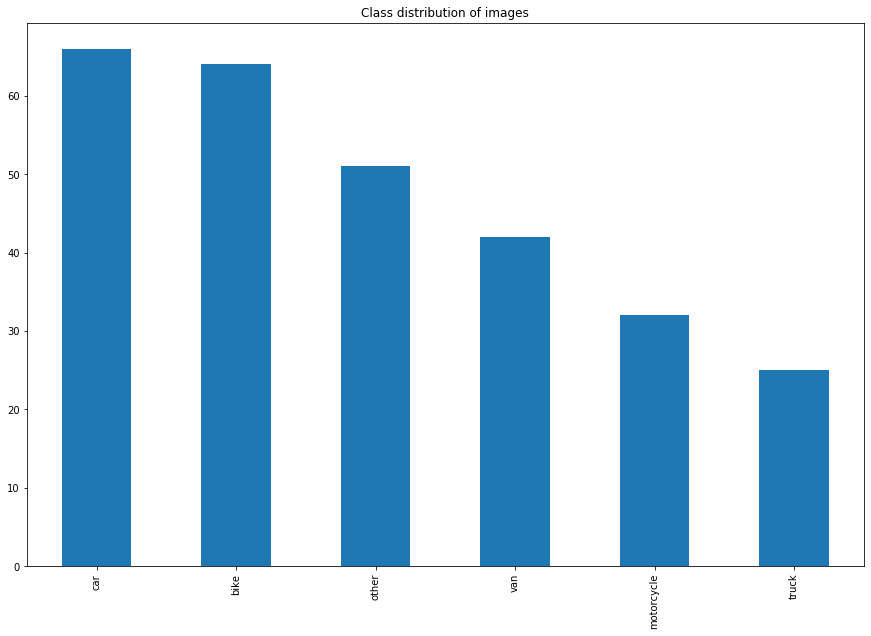

In [12]:
# Check the class distribution of the labels

fig = plt.figure(figsize=(15,10))
pd.value_counts(train_dataset_array_labels).plot(kind='bar')
plt.xticks(np.arange(class_limit), class_names)
plt.title('Class distribution of images')
plt.show()

In [13]:
# Getting a baseline
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_tr, y_tr)
baseline = dummy.score(X_val, y_val)
print ('Baseline Accuracy {:.3f}'.format(baseline))

Baseline Accuracy 0.237


Apply PCA without specifying the number of components first.

In [14]:
pca = PCA(n_components=None)
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
# Get explained variance
pca.explained_variance_ratio_

array([1.3634457e-01, 5.6713540e-02, 5.3716160e-02, 2.7862772e-02,
       2.2121951e-02, 2.0352816e-02, 1.8260829e-02, 1.6825445e-02,
       1.4645744e-02, 1.4512848e-02, 1.3826860e-02, 1.3293909e-02,
       1.2365083e-02, 1.1740182e-02, 1.0806610e-02, 1.0458493e-02,
       9.5029362e-03, 9.0513127e-03, 9.0084216e-03, 8.8626444e-03,
       8.3948458e-03, 8.0609694e-03, 7.7560456e-03, 7.5810007e-03,
       7.4351635e-03, 7.2356146e-03, 7.1310187e-03, 6.7057707e-03,
       6.5344013e-03, 6.3357749e-03, 6.2702084e-03, 6.0024248e-03,
       5.9250765e-03, 5.7758973e-03, 5.7093226e-03, 5.6474661e-03,
       5.5631530e-03, 5.4140589e-03, 5.3313058e-03, 5.2268608e-03,
       4.9967654e-03, 4.9799150e-03, 4.8882249e-03, 4.7294307e-03,
       4.6665221e-03, 4.4911392e-03, 4.4749011e-03, 4.3801777e-03,
       4.3355944e-03, 4.2260494e-03, 4.1928231e-03, 4.1622049e-03,
       4.0949685e-03, 4.0189000e-03, 3.9864001e-03, 3.9085825e-03,
       3.8734421e-03, 3.7404411e-03, 3.7144371e-03, 3.6543792e

In [16]:
pca.explained_variance_ratio_[0:2]

array([0.13634457, 0.05671354], dtype=float32)

In our case, 13.6% of the total variance is contained in the first principal component and 5.6% in the second one.

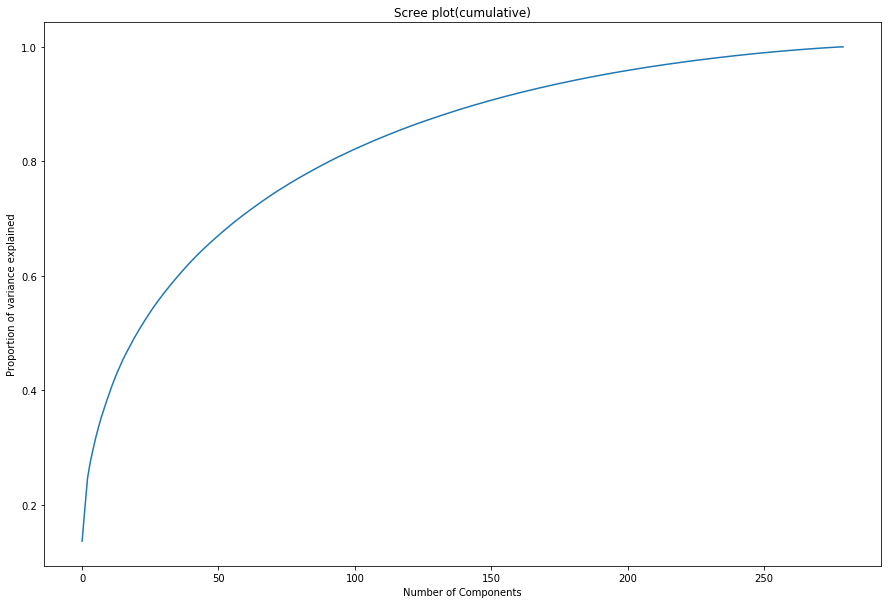

In [17]:
# Create a scree plot
pve = pca.explained_variance_ratio_
fig = plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(pve))
plt.xlabel('Number of Components')
plt.ylabel('Proportion of variance explained')
plt.title('Scree plot(cumulative)')
plt.show()

About 250 components explain all the variance in the data.

In [18]:
pve_cumsum = np.cumsum(pve)
df_pve = pd.DataFrame.from_items([('cumulated', pve_cumsum)]).round(3)
df_pve['cumulated']

/Users/laura/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


0      0.136
1      0.193
2      0.247
3      0.275
4      0.297
       ...  
275    0.999
276    0.999
277    1.000
278    1.000
279    1.000
Name: cumulated, Length: 280, dtype: float32

In [19]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [21]:
print('Components needed to explain 10% of the variance: ', str(find_nearest(df_pve['cumulated'], 0.10)))
print('Components needed to explain 20% of the variance: ', str(find_nearest(df_pve['cumulated'], 0.20)))
print('Components needed to explain 50% of the variance: ', str(find_nearest(df_pve['cumulated'], 0.50)))
print('Components needed to explain 80% of the variance: ', str(find_nearest(df_pve['cumulated'], 0.80)))
print('Components needed to explain 90% of the variance: ', str(find_nearest(df_pve['cumulated'], 0.90)))
print('Components needed to explain 95% of the variance: ', str(find_nearest(df_pve['cumulated'], 0.95)))
print('Components needed to explain 99% of the variance: ', str(find_nearest(df_pve['cumulated'], 0.99)))

Components needed to explain 10% of the variance:  0
Components needed to explain 20% of the variance:  1
Components needed to explain 50% of the variance:  20
Components needed to explain 80% of the variance:  91
Components needed to explain 90% of the variance:  145
Components needed to explain 95% of the variance:  189
Components needed to explain 99% of the variance:  250


In [77]:
# Reducing our features to two components using PCA

pca2 = PCA(n_components=2) # Apply PCA
pca2.fit(X_tr, y=None); # Unsupervised learning, no y variable

In [78]:
# Project data onto the first two components
X_2d = pca2.transform(X_tr)

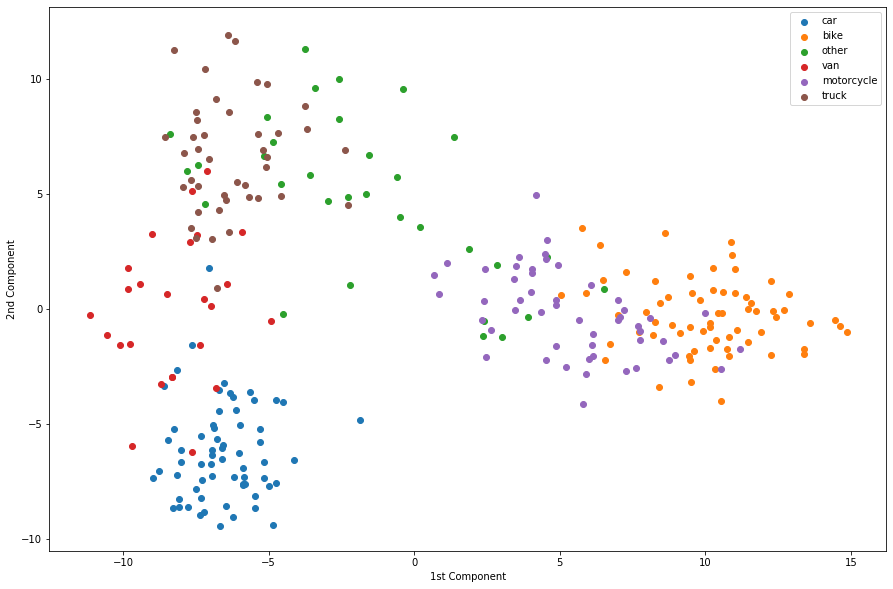

In [79]:
fig = plt.figure(figsize=(15, 10))

for i in range(class_limit):
    idx = (y_tr == i)
    plot_0 = X_2d[idx, 0]
    plot_1 = X_2d[idx, 1]
    plt.scatter(X_2d[idx, 0], X_2d[idx, 1], label = class_names[i])
    
plt.legend()
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.show()

In [80]:
# Standardize the data
scaler = StandardScaler()
# Rescale data
X_rescaled = scaler.fit_transform(X_tr) 

Applying PCA without specifying the number of components first.

In [81]:
# Create PCA transformer
pca3 = PCA(n_components=None) 
# Apply PCA to rescaled data
pca3.fit(X_rescaled)
# Proportion of variance explained
pve = pca3.explained_variance_ratio_
pve

array([9.93640870e-02, 5.21952510e-02, 4.39185239e-02, 2.62376890e-02,
       2.24262308e-02, 2.02210769e-02, 1.83037315e-02, 1.59639865e-02,
       1.45329228e-02, 1.41710285e-02, 1.37818605e-02, 1.33910403e-02,
       1.25557669e-02, 1.17456093e-02, 1.10221701e-02, 1.01126507e-02,
       9.85042192e-03, 9.25539341e-03, 9.02106985e-03, 8.82535148e-03,
       8.66503455e-03, 8.53090454e-03, 8.25883634e-03, 7.90727511e-03,
       7.56300474e-03, 7.40343472e-03, 7.17009557e-03, 6.91374997e-03,
       6.76889624e-03, 6.58516958e-03, 6.52208412e-03, 6.33881195e-03,
       6.29757997e-03, 6.27465965e-03, 6.05697837e-03, 6.03595888e-03,
       5.91187226e-03, 5.84878260e-03, 5.64241642e-03, 5.41978143e-03,
       5.35219628e-03, 5.29968832e-03, 5.23594301e-03, 5.13123348e-03,
       4.97100921e-03, 4.92737209e-03, 4.84516146e-03, 4.69827978e-03,
       4.64391289e-03, 4.59250016e-03, 4.56700195e-03, 4.52606427e-03,
       4.43860563e-03, 4.35637310e-03, 4.28826828e-03, 4.24773106e-03,
      

In [82]:
pca4 = PCA(n_components=2)
# Apply PCA to rescaled data
X_2d_rescaled = pca4.fit_transform(X_rescaled)

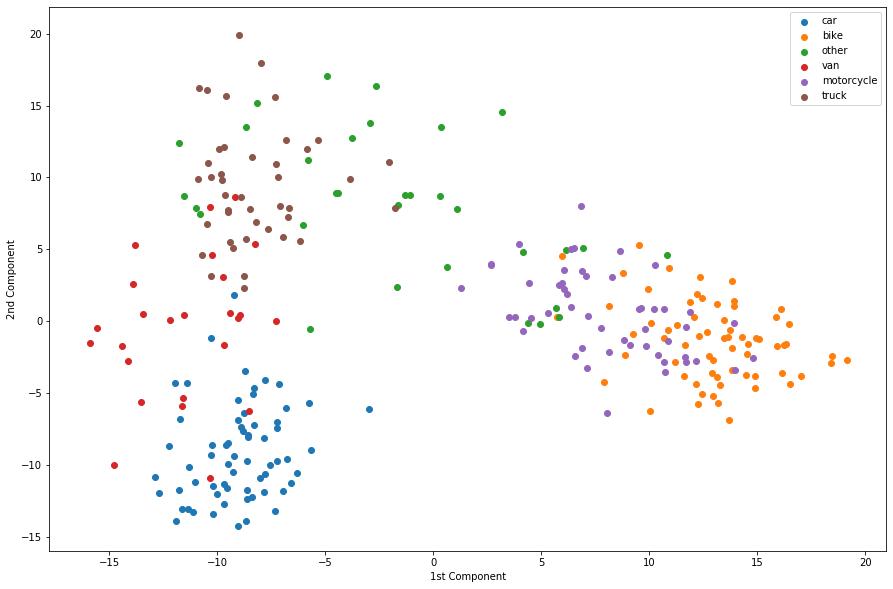

In [83]:
fig = plt.figure(figsize=(15, 10))

for i in range(class_limit):
    idx = (y_tr == i)
    plot_0 = X_2d_rescaled[idx, 0]
    plot_1 = X_2d_rescaled[idx, 1]
    plt.scatter(X_2d_rescaled[idx, 0], X_2d_rescaled[idx, 1], label = class_names[i])
    
plt.legend()
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.show()

Although very similar to the previous plot, we note here that some samples occupy a different region of this new feature space. In that sense, it seems that PCA was able to learn by itself some higher level information from the features.

In [84]:
# Get explained variance
pca4.explained_variance_ratio_

array([0.09936408, 0.0521952 ], dtype=float32)

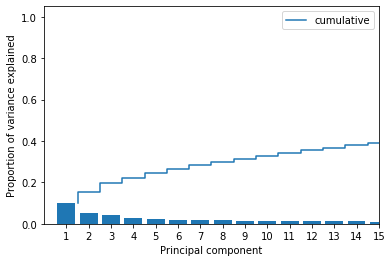

In [90]:
import numpy as np
# Create bar plot
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components 
plt.bar(xcor, pve)
plt.xticks(xcor)
  
# Add cumulative sum
pve_cumsum = np.cumsum(pve) 
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5 
    pve_cumsum, # Cumulative sum 
    label='cumulative'
)
# Add labels
plt.xlabel('Principal component') 
plt.ylabel('Proportion of variance explained') 
plt.legend()
axes = plt.gca()
axes.set_xlim([0,15])
plt.show()